# import Libraries and Data 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from scipy import stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn import preprocessing

# VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Split Dataset
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Model Evaluation
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Hypothesis Testing
import scipy.stats as st

In [2]:
df = pd.read_csv('employee_data.csv')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
# Missing Value Check
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [5]:
# Check Duplicates Data
df.duplicated().sum()

0

In [6]:
df.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
IkutProgramLOP                          2
AlasanResign                           11
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan          

In [7]:
# overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Username,object,0,0.00,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,0.00,287,"[111065, 106080, 106452, 106325, 111171, 10641..."
2,StatusPernikahan,object,0,0.00,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.00,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,0.00,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,0.00,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,0.00,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


In [8]:
df['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

**Observation** :

- Data contains 25 column with 287 rows
- There are few columns with missing data, IkutProgramLOP column has 258 missing data
- No Duplicate Data found in the dataset
- PernahBekerja needs to be removed because the data actually only consists of one value

In [9]:
num_dtypes = ['int16', 'int32', 'int64', 'float', 'float16', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include = num_dtypes)
numerical = num_df.columns
print(numerical)

cat_dtypes = ['object']
cat_df = df.select_dtypes(include = cat_dtypes)
categorical = cat_df.columns
print(categorical)

Index(['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'IkutProgramLOP'],
      dtype='object')
Index(['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian',
       'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah',
       'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan',
       'PernahBekerja', 'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign'],
      dtype='object')


In [10]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Username:
Username
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: count, Length: 285, dtype: int64

Value count kolom StatusPernikahan:
StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64

Value count kolom JenisKelamin:
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64

Value count kolom StatusKepegawaian:
StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64

Value count kolom Pekerjaan:
Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst        

In [11]:
for col in numerical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom EnterpriseID:
EnterpriseID
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: count, Length: 287, dtype: int64

Value count kolom SkorSurveyEngagement:
SkorSurveyEngagement
3    132
4     96
2     43
1     14
5      2
Name: count, dtype: int64

Value count kolom SkorKepuasanPegawai:
SkorKepuasanPegawai
3.0    96
5.0    91
4.0    85
2.0     8
1.0     2
Name: count, dtype: int64

Value count kolom JumlahKeikutsertaanProjek:
JumlahKeikutsertaanProjek
0.0    221
6.0     20
5.0     20
7.0      9
4.0      8
3.0      3
1.0      1
2.0      1
8.0      1
Name: count, dtype: int64

Value count kolom JumlahKeterlambatanSebulanTerakhir:
JumlahKeterlambatanSebulanTerakhir
0.0    255
4.0      8
3.0      6
2.0      6
5.0      5
6.0      5
1.0      1
Name: count, dtype: int64

Value count kolom JumlahKetidakhadiran:
JumlahKetidakhadiran
4.0     20
2.0     20
15.0    19
7.0     17
16.0    17
6.0     

In [12]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [74]:
df_cat = df[['JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan']]
cat = df_cat.columns
df_cat

,JenisKelamin,StatusKepegawaian,Pekerjaan,AsalDaerah,HiringPlatform,TingkatPendidikan
0,Pria,Outsource,Software Engineer (Back End),Jakarta Timur,Employee_Referral,Magister
1,Pria,FullTime,Data Analyst,Jakarta Utara,Website,Sarjana
2,Pria,FullTime,Software Engineer (Front End),Jakarta Timur,Indeed,Magister
3,Pria,Outsource,Software Engineer (Front End),Jakarta Pusat,LinkedIn,Sarjana
4,Wanita,FullTime,Product Manager,Jakarta Timur,LinkedIn,Sarjana
...,...,...,...,...,...,...
282,Wanita,FullTime,Data Engineer,Jakarta Pusat,Google_Search,Sarjana
283,Wanita,FullTime,Product Design (UI & UX),Jakarta Timur,LinkedIn,Sarjana
284,Wanita,FullTime,Software Engineer (Front End),Jakarta Pusat,Diversity_Job_Fair,Sarjana
285,Pria,FullTime,Software Engineer (Android),Jakarta Utara,Google_Search,Sarjana


In [93]:
df_num= df[['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']]
num = df_num.columns

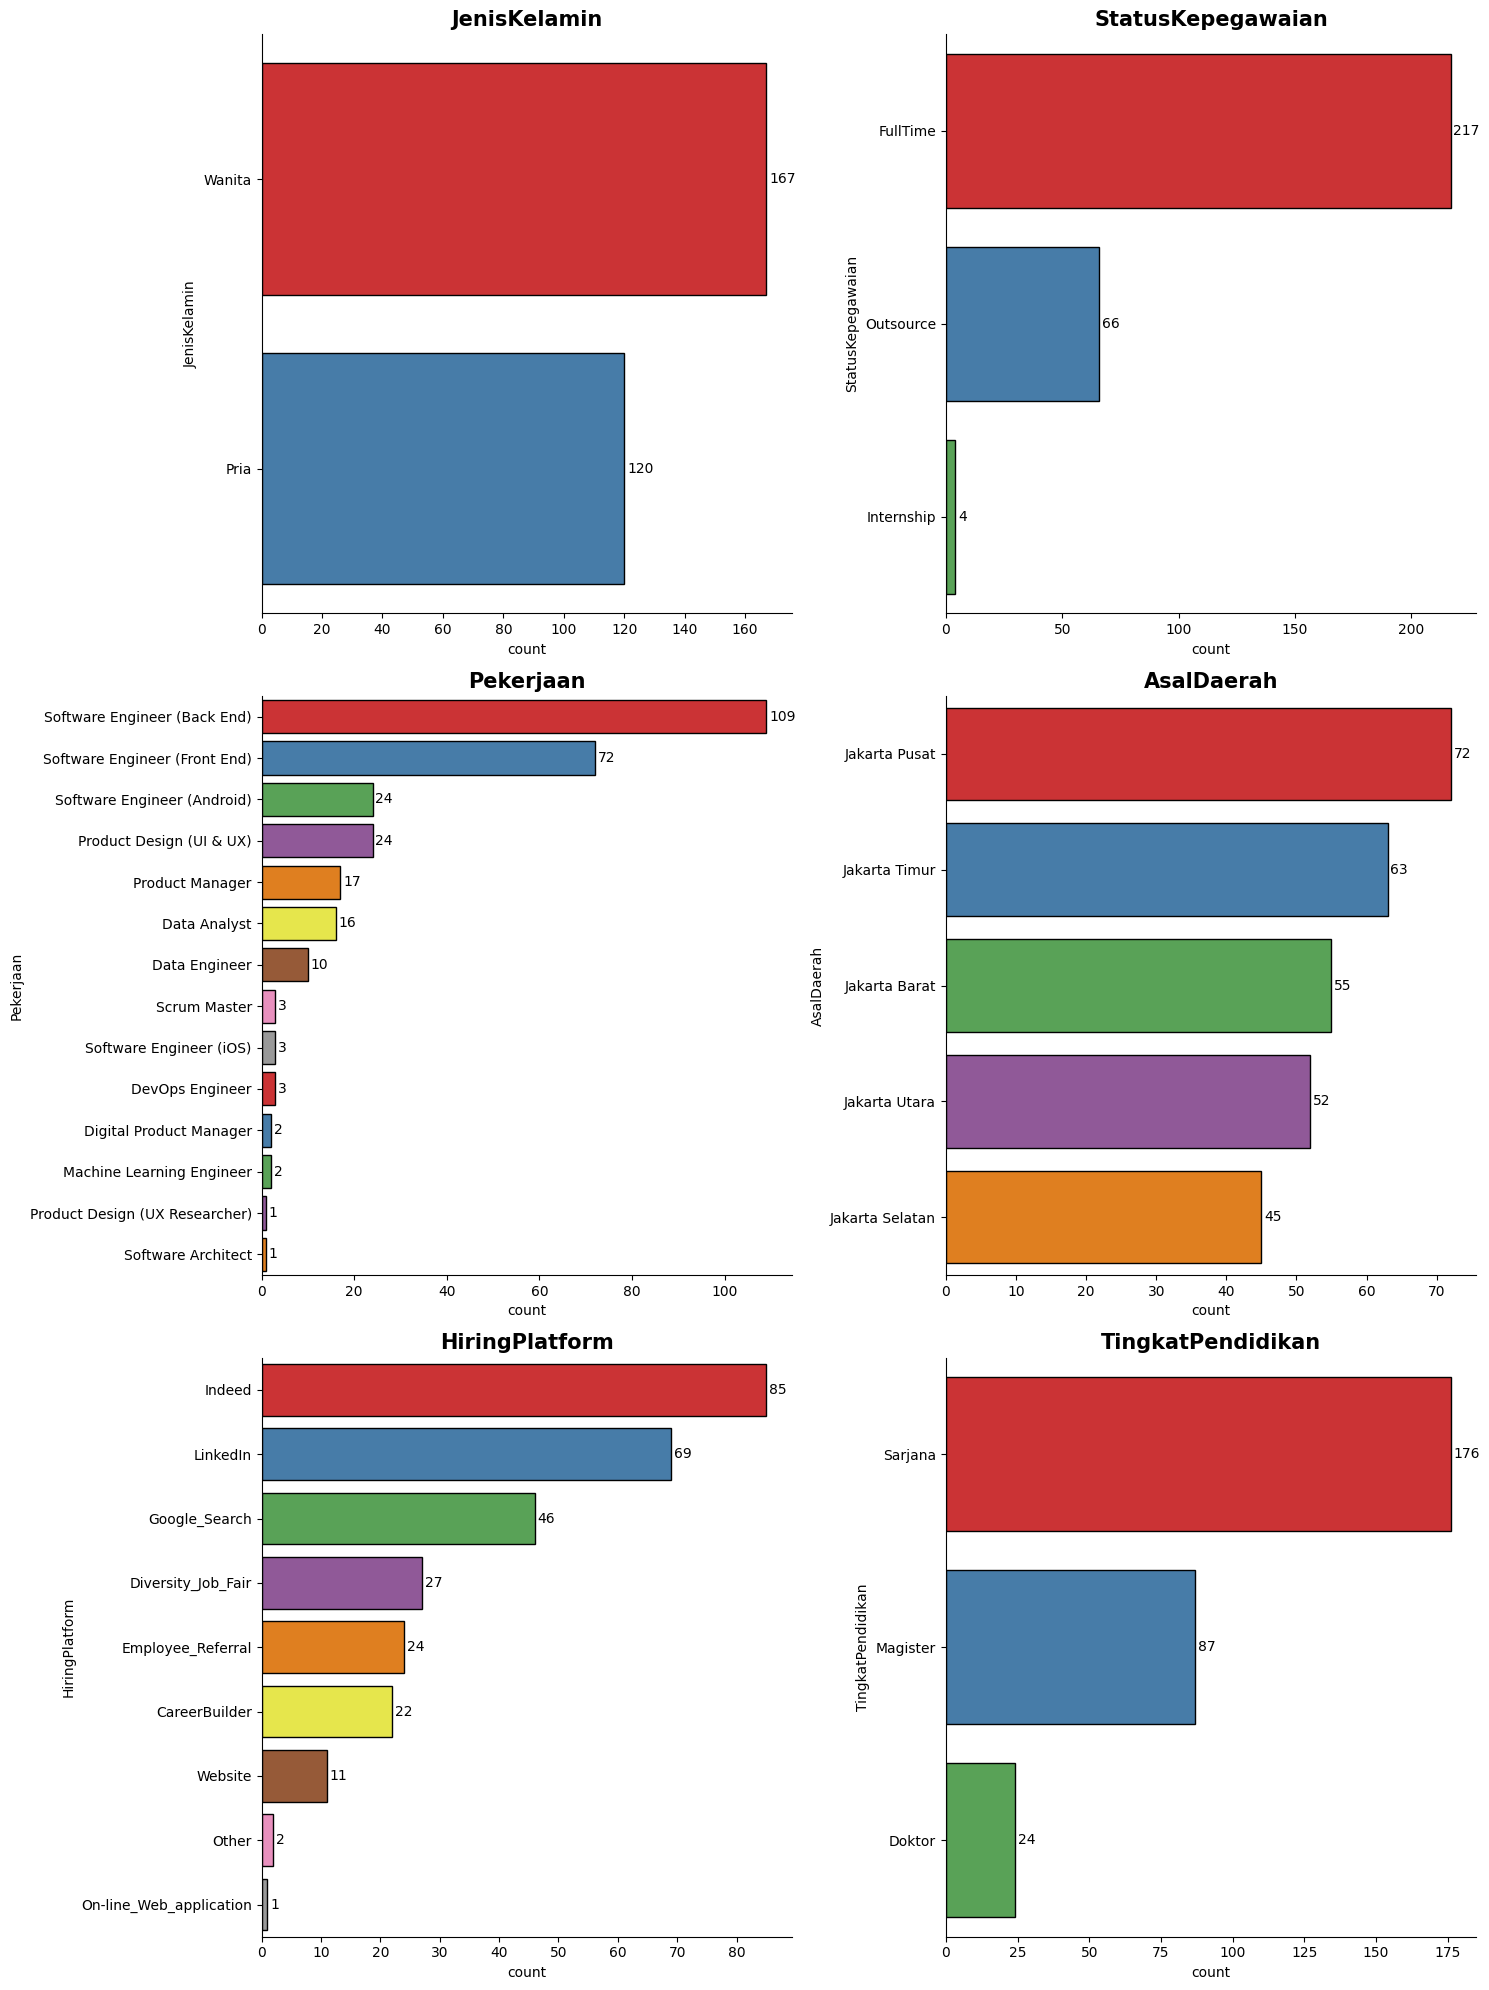

In [101]:
plt.figure(figsize=(15,20))
for i in range(len(cat)):
    plt.subplot(3,2, i+1)
    ax = sns.countplot(y=cat[i], data=df_cat, palette='Set1', order=df_cat[cat[i]].value_counts().index,edgecolor='black')
    plt.bar_label(ax.containers[0], padding=2)
    ax.set_title(cat[i], fontsize=15, color='black', weight='bold')
sns.despine()
plt.tight_layout()
plt.show()

### Key Takeways

1. Position with most person is Software Engineer
2. Most of the staff is a bachelor.
3. Most of the staff is in fulltime position
4. Indeed is the highest hiringplatform used.

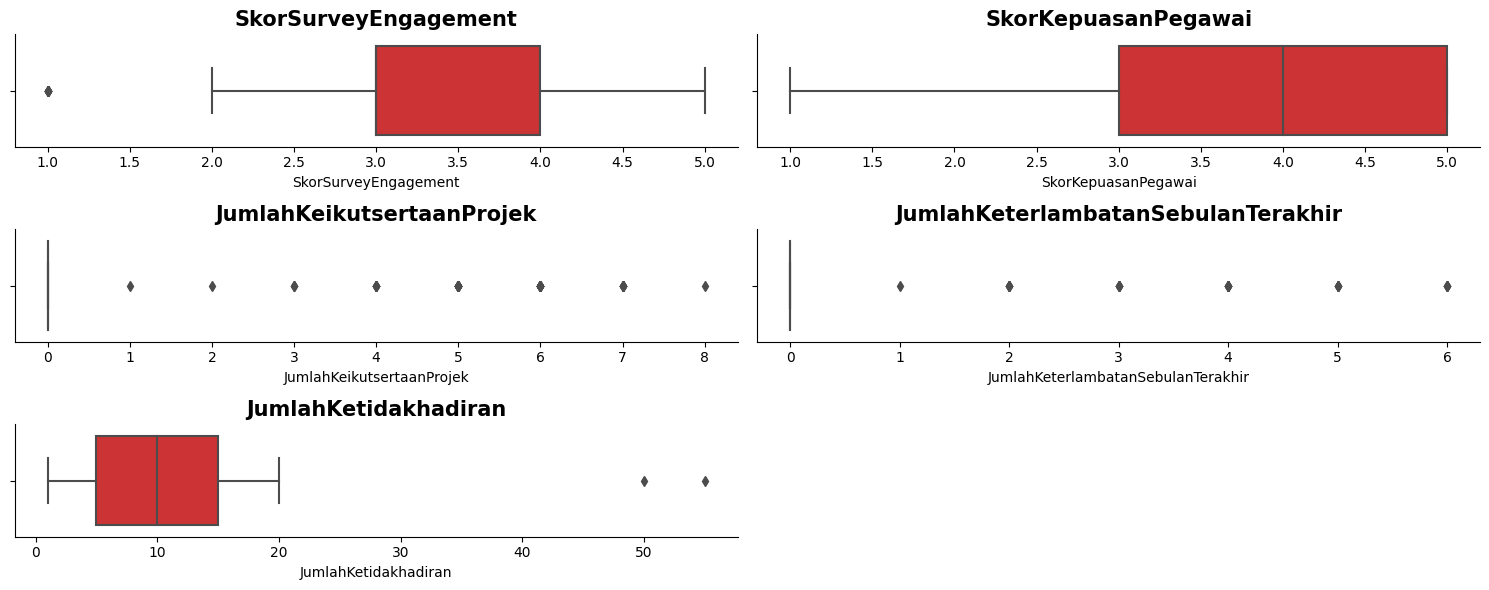

In [99]:
plt.figure(figsize=(15,6))
for i in range(len(num)):
    plt.subplot(3,2, i+1)
    ax = sns.boxplot(x=num[i], data=df, palette='Set1')
    ax.set_title(num[i], fontsize=15, color='black', weight='bold')
    # plt.bar_label(ax.containers[0], padding=2)
    # plt.bar_label(ax.containers[1], padding=2)
sns.despine()
plt.tight_layout()
plt.show()

### Key Takeaways
1. The distribution of all feature is not normal
2. There are a few pencilan in every features

## Data Pre-Processing

### Handling Null Values

In [50]:
df_pre = df.copy()

In [51]:
df_pre[numerical].isna().sum()

EnterpriseID                            0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
IkutProgramLOP                        258
dtype: int64

In [52]:
df_pre[categorical].isna().sum()

Username                     0
StatusPernikahan             0
JenisKelamin                 0
StatusKepegawaian            0
Pekerjaan                    0
JenjangKarir                 0
PerformancePegawai           0
AsalDaerah                   0
HiringPlatform               0
NomorHP                      0
Email                        0
TingkatPendidikan            0
PernahBekerja                0
AlasanResign                66
TanggalLahir                 0
TanggalHiring                0
TanggalPenilaianKaryawan     0
TanggalResign                0
dtype: int64

In [53]:
#Fill Missing numerical data
for col in df_pre[numerical].columns :
    df_pre[col].fillna(df_pre[col].median(), inplace = True)
df_pre[numerical].isna().sum()

EnterpriseID                          0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
IkutProgramLOP                        0
dtype: int64

In [54]:
# Drop IkutProgramLOP karena terlalu banyak null values (89%)
df_pre.drop(columns='IkutProgramLOP', inplace = True, axis = 1)
df_pre.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
257,puzzledUnicorn3,101135,Menikah,Wanita,FullTime,Digital Product Manager,Freshgraduate_program,Sangat_kurang,Jakarta Timur,LinkedIn,...,15.0,+6289989448xxx,puzzledUnicorn3199@outlook.com,Sarjana,1,NaN,1976-12-26,2013-07-08,2017-06-10,-
90,grumpyCow6,100597,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,...,2.0,+6289763743xxx,grumpyCow6508@icloud.com,Sarjana,1,masih_bekerja,1988-04-15,2018-07-09,2020-1-31,-
174,thrilledThrushe4,101154,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Selatan,Indeed,...,18.0,+6289793710xxx,thrilledThrushe4101@outlook.com,Sarjana,1,ganti_karir,1972-11-09,2012-9-24,2018-04-01,2017-11-14
250,jubilantTeal7,106547,Lainnya,Pria,FullTime,DevOps Engineer,Freshgraduate_program,Bagus,Jakarta Barat,Employee_Referral,...,16.0,+6287898271xxx,jubilantTeal7049@hotmail.com,Magister,1,NaN,1970-02-08,2015-01-05,2020-1-14,-
11,grizzledSnipe7,111354,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,CareerBuilder,...,2.0,+6289987666xxx,grizzledSnipe7992@outlook.com,Magister,1,tidak_bahagia,1989-07-18,2011-07-05,2016-02-06,2018-9-19


In [55]:
def resign(value):
    if value == "-":
        return 0
    else:
        return 1
    
df_pre['StatusResign'] = df_pre['TanggalResign'].apply(lambda x : resign(x))
df_pre['StatusResign'].value_counts()

StatusResign
0    198
1     89
Name: count, dtype: int64

## Handling Invalid Values

In [56]:
#drop PernahBekerja because it contains only 1 value

df_pre['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

In [57]:
df_pre = df_pre.drop(columns = 'PernahBekerja', axis= 1)

In [58]:
# Null Values in Alasan Resign means that the person is not resigned or masih_bekerja yet

df_pre[(df_pre['StatusResign'] != 0) & (df_pre['AlasanResign'].isnull() )] 

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusResign


In [59]:
df_pre['AlasanResign'] = df_pre['AlasanResign'].fillna('masih_bekerja')
df_pre['AlasanResign'].isna().sum()

0

In [60]:
df_pre.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
StatusResign                          0
dtype: int64

## Convert Data Type

In [61]:
df_pre['TanggalLahir'] = pd.to_datetime( df_pre['TanggalLahir'] )
df_pre['TanggalHiring'] = pd.to_datetime( df_pre['TanggalHiring'] )
df_pre['TanggalPenilaianKaryawan'] = pd.to_datetime( df_pre['TanggalPenilaianKaryawan'] )
df_pre['TanggalResign'] = pd.to_datetime( df_pre['TanggalResign'], errors='coerce')

In [62]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [63]:
df_pre.sample(4)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusResign
48,soreCaribou0,111250,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,...,18.0,+6285700061xxx,soreCaribou0431@outlook.com,Magister,masih_bekerja,1984-07-07,2013-04-01,2020-01-17,NaT,0
224,affectedLollies9,106673,Bercerai,Wanita,FullTime,Software Engineer (Back End),Mid_level,Biasa,Jakarta Pusat,Indeed,...,1.0,+6289519764xxx,affectedLollies9935@proton.com,Sarjana,masih_bekerja,1965-05-09,2011-07-05,2017-03-02,NaT,0
267,importedOwl7,111336,Bercerai,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_kurang,Jakarta Barat,Diversity_Job_Fair,...,13.0,+6285664605xxx,importedOwl7056@icloud.com,Magister,masih_bekerja,1979-02-20,2011-11-07,2016-08-16,NaT,0
180,joyfulCockatoo5,110858,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,Google_Search,...,1.0,+6289989384xxx,joyfulCockatoo5977@hotmail.com,Magister,masih_bekerja,1983-12-08,2013-09-30,2020-02-21,NaT,0


In [ ]:
df

## EDA

In [70]:
df_eda = df_pre.copy()

In [71]:
df_eda.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,0
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,1


In [ ]:
df_eda.drop(columns = ('Username', 'EnterpriseID', 'NomorHP', 'email'))

## Univariate Analysis

## Feature Encoding

df_pre['is_Male'] = df_pre['JenisKelamin'].replace({'Pria':1, 'Wanita':0})
df_pre[['is_Male','JenisKelamin']].sample(5)

def jenjangkarir_endcode(values):
    if values == 'Freshgraduate_program':
        return 0
    elif values == 'Mid_level':
        return 1
    elif values == 'Senior_level':
        return 2

df_pre['Career_level'] = df_pre['JenjangKarir'].apply(lambda x : jenjangkarir_endcode(x))

df_pre[['Career_level','JenjangKarir']].sample(3,random_state=12)